In [2]:
#Import dataset into file
import pandas as pd
df = pd.read_csv('~/StockData/AAPL.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-07,150.639999,155.229996,150.639999,154.649994,153.790375,83322600
1,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.075562,64120100
2,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031387,56007100
3,2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399902,57450700
4,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000
...,...,...,...,...,...,...,...
246,2024-01-31,187.039993,187.100006,184.350006,184.399994,184.399994,55467800
247,2024-02-01,183.990005,186.949997,183.820007,186.860001,186.860001,64885400
248,2024-02-02,179.860001,187.330002,179.250000,185.850006,185.850006,102518000
249,2024-02-05,188.149994,189.250000,185.839996,187.679993,187.679993,69668800


In [3]:
df = df[['Date', 'Close']] 
df

,Date,Close
0,2023-02-07,154.649994
1,2023-02-08,151.919998
2,2023-02-09,150.869995
3,2023-02-10,151.009995
4,2023-02-13,153.850006
...,...,...
246,2024-01-31,184.399994
247,2024-02-01,186.860001
248,2024-02-02,185.850006
249,2024-02-05,187.679993


In [4]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2]) 
    return datetime.datetime(year=year, month=month, day=day)

datename_object = str_to_datetime('2023-02-07')
datename_object

datetime.datetime(2023, 2, 7, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df

/tmp/ipykernel_4432/1287539604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date,Close
0,2023-02-07,154.649994
1,2023-02-08,151.919998
2,2023-02-09,150.869995
3,2023-02-10,151.009995
4,2023-02-13,153.850006
...,...,...
246,2024-01-31,184.399994
247,2024-02-01,186.860001
248,2024-02-02,185.850006
249,2024-02-05,187.679993


In [6]:
df.index = df.pop('Date')
df

,Close
Date,
2023-02-07,154.649994
2023-02-08,151.919998
2023-02-09,150.869995
2023-02-10,151.009995
2023-02-13,153.850006
...,...
2024-01-31,184.399994
2024-02-01,186.860001
2024-02-02,185.850006


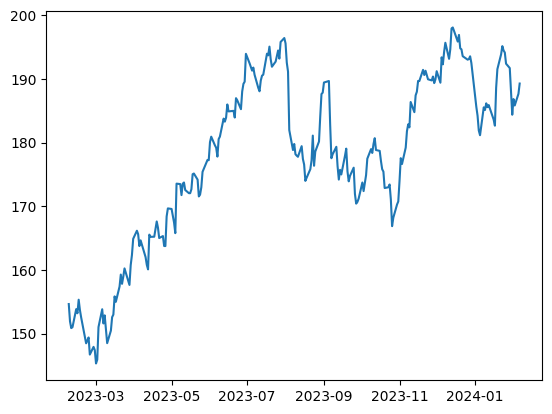

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.index ,df['Close']) 

In [8]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, '2023-02-10','2024-02-06', n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-02-10,154.649994,151.919998,150.869995,151.009995
1,2023-02-13,151.919998,150.869995,151.009995,153.850006
2,2023-02-14,150.869995,151.009995,153.850006,153.199997
3,2023-02-15,151.009995,153.850006,153.199997,155.330002
4,2023-02-16,153.850006,153.199997,155.330002,153.710007
...,...,...,...,...,...
243,2024-01-31,192.419998,191.729996,188.039993,184.399994
244,2024-02-01,191.729996,188.039993,184.399994,186.860001
245,2024-02-02,188.039993,184.399994,186.860001,185.850006
246,2024-02-05,184.399994,186.860001,185.850006,187.679993


In [20]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:,0]
    mat1 = df_as_np[:,1:-1] 
    X = mat1.reshape((len(dates), mat1.shape[1], 1)) 
    y = df_as_np[:, -1]
    return dates, X.astype(np.float32), y.astype(np.float32) 

dates ,X ,y = windowed_df_to_date_X_y(windowed_df) 

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

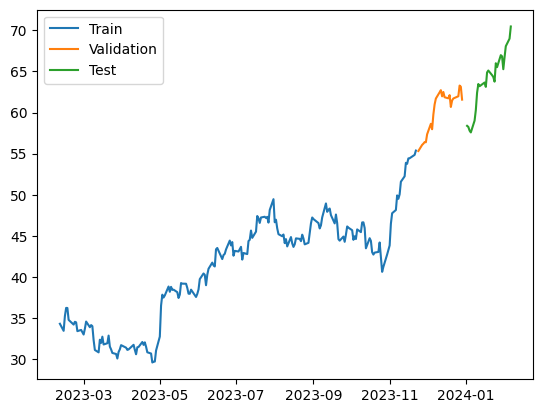

In [21]:
q_80 = int(len(dates)*0.8) 
q_90 = int(len(dates)*0.9) 

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 46ms/step - loss: 1697.2389 - mean_absolute_error: 40.6911 - val_loss: 3540.9082 - val_mean_absolute_error: 59.4518
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 1644.3572 - mean_absolute_error: 40.0346 - val_loss: 3464.5769 - val_mean_absolute_error: 58.8062
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 1586.1521 - mean_absolute_error: 39.2944 - val_loss: 3371.9487 - val_mean_absolute_error: 58.0131
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1513.1104 - mean_absolute_error: 38.3476 - val_loss: 3255.2954 - val_mean_absolute_error: 56.9983
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 1419.2910 - mean_absolute_error: 37.0972 - val_loss: 3103.4724 - val_mean_absolute_error: 55.6498
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 1288.2754 - mean_absolute_error: 35.2433 - val_loss: 2880.2861 - val_mean_absolute_

7/7 [==============================] - 0s 2ms/step


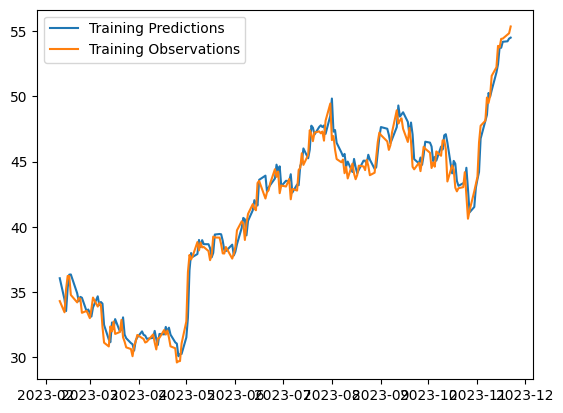

In [24]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 14ms/step


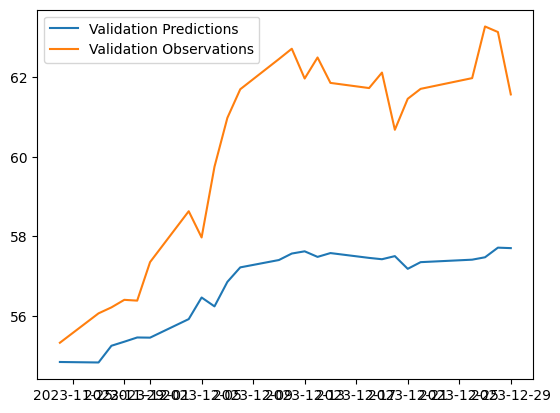

In [25]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 13ms/step


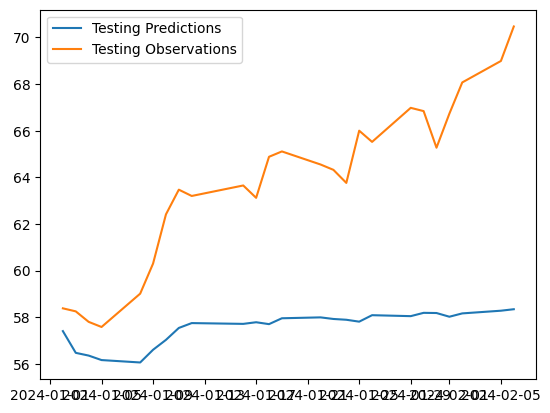

In [26]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

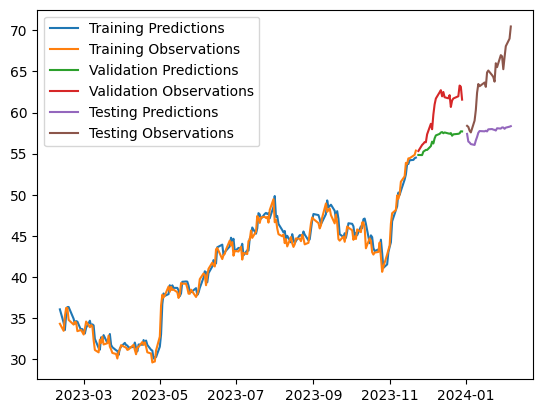

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])